In [63]:
## öncelikle şimdilik gereken kütüphaneleri indirelim
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [77]:
# veri setini yükle
boston = load_boston()
# veri setini dataframe' e çevirelim
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target

print(boston.data.shape)  # özelliklerin sayısı
print(boston.target.shape)  # fiyatların sayısı
print(boston.data[:5])  # ilk 5 evin özellikleri
print(boston.target[:5])  # ilk 5 evin fiyatları

(506, 13)
(506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


C:\Users\Meric\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

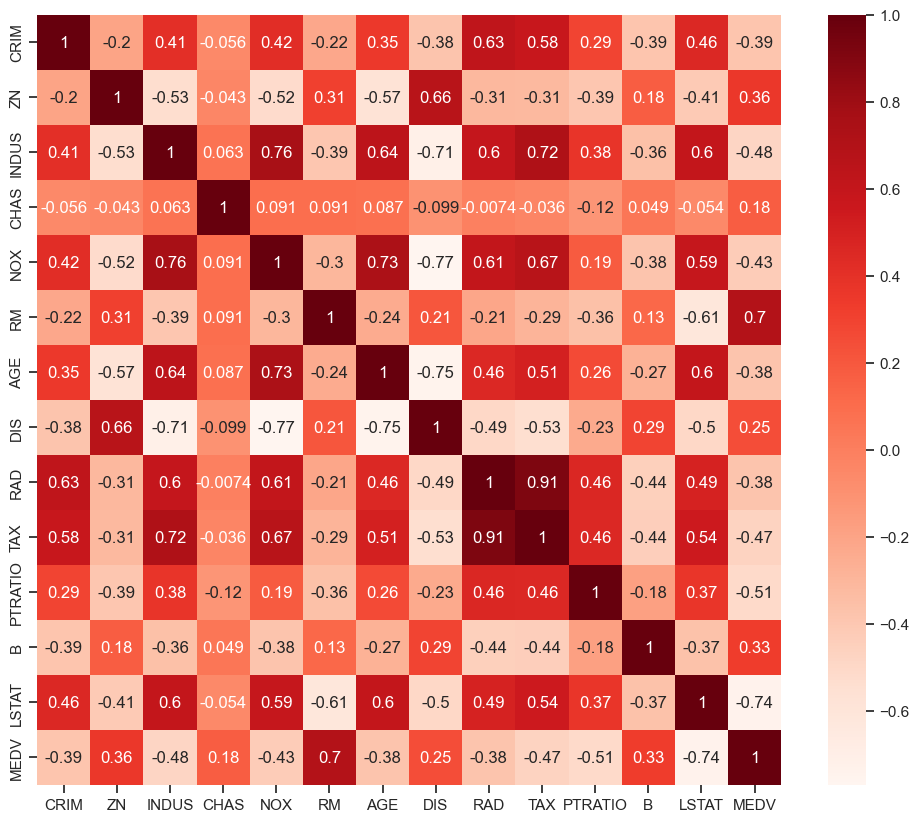

In [72]:
# korelasyon matrisi
corr_matrix = df.corr()

# heatmap olarak görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [75]:
# drop işlemi
#RAD değişkeni tax ile çok fazla korelasyonlu ve bir tanesini kaldırmak istedim
#NOX ise DIS değişkeni ile çok yüksek negatif korelasyonlu birini kaldırmak istedim
df2 = df.drop(['RAD', 'NOX'], axis=1)
df2['MEDV'] = boston.target

In [21]:
# kalan değişkenlerin korelasyon matrisini hesapla
corr_matrix2 = df2.corr()

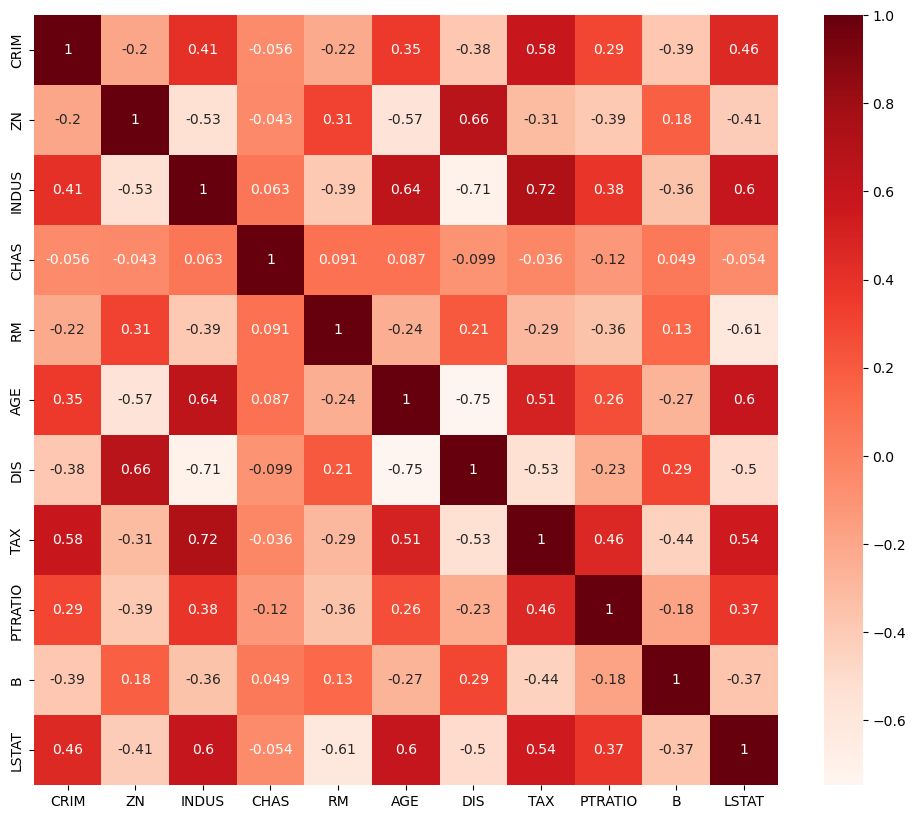

In [7]:
# heatmap olarak görselleştir
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix2, annot=True, cmap=plt.cm.Reds)
plt.show()

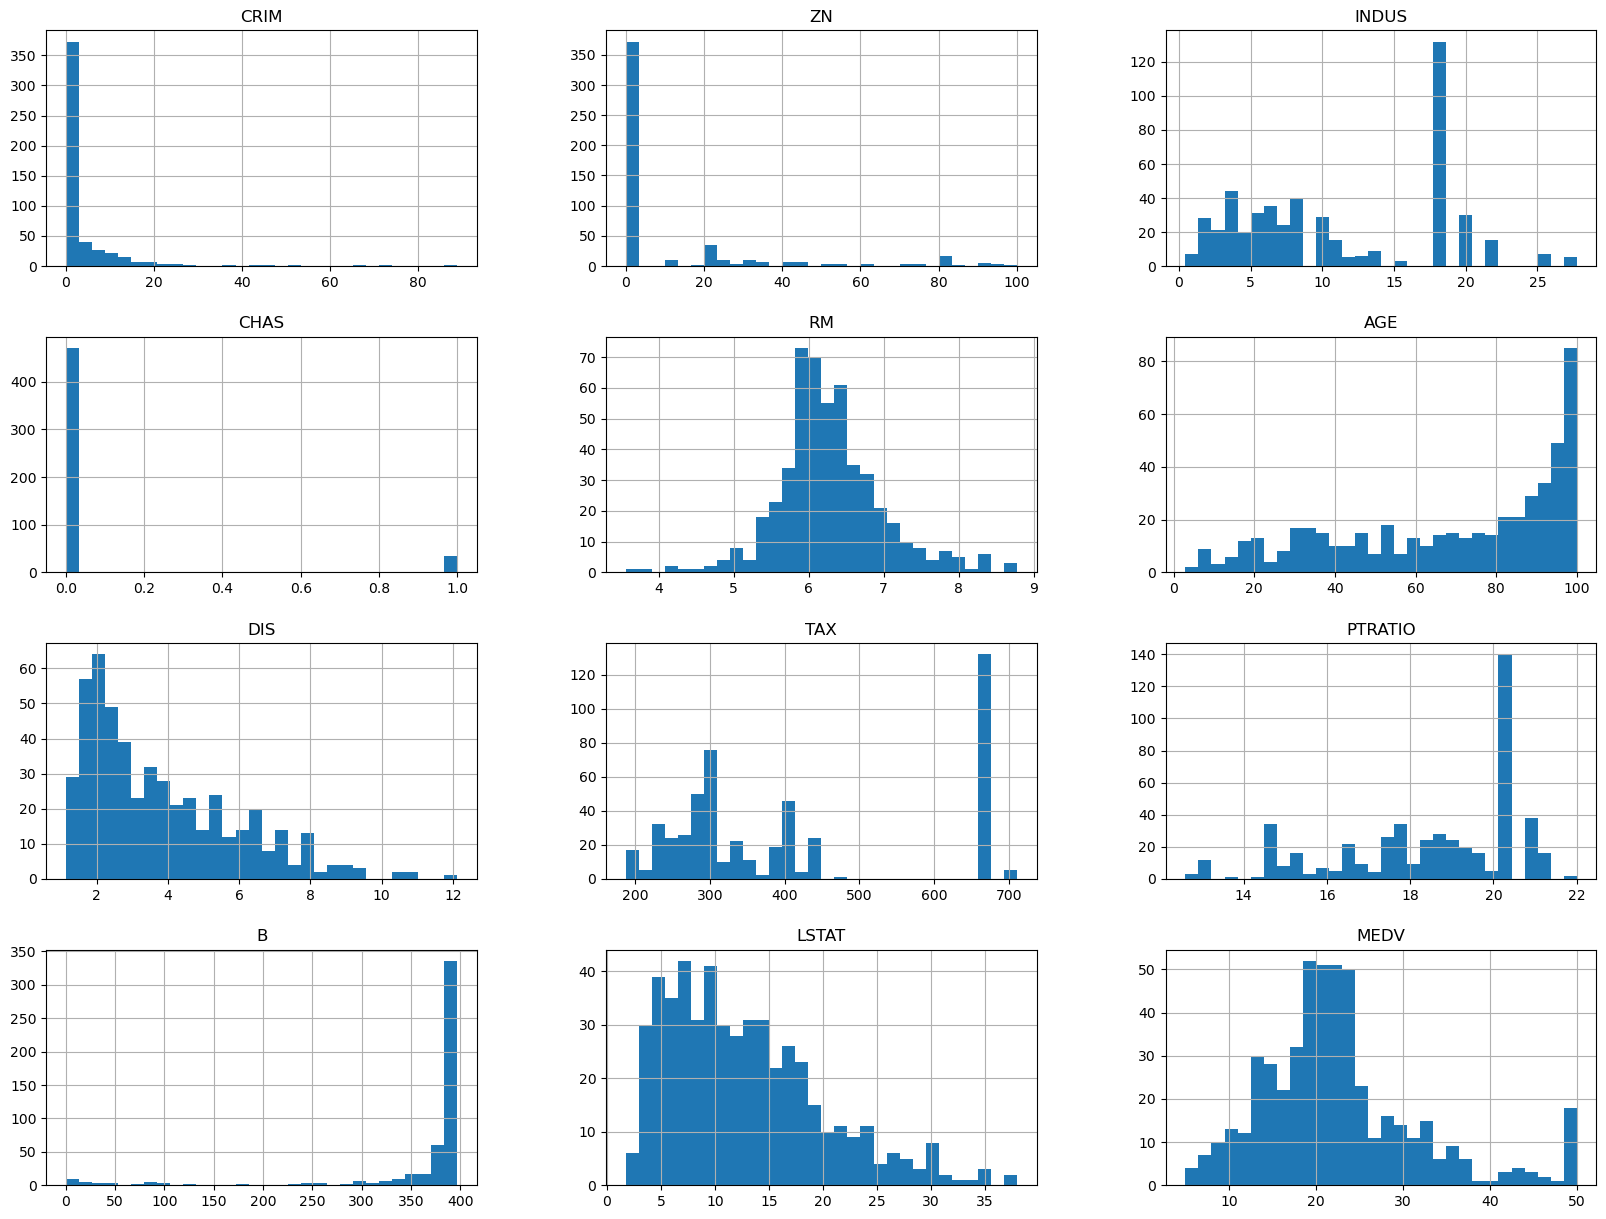

In [22]:
# değişkenlerin histogramları
df2.hist(bins=30, figsize=(20,15))
plt.show()

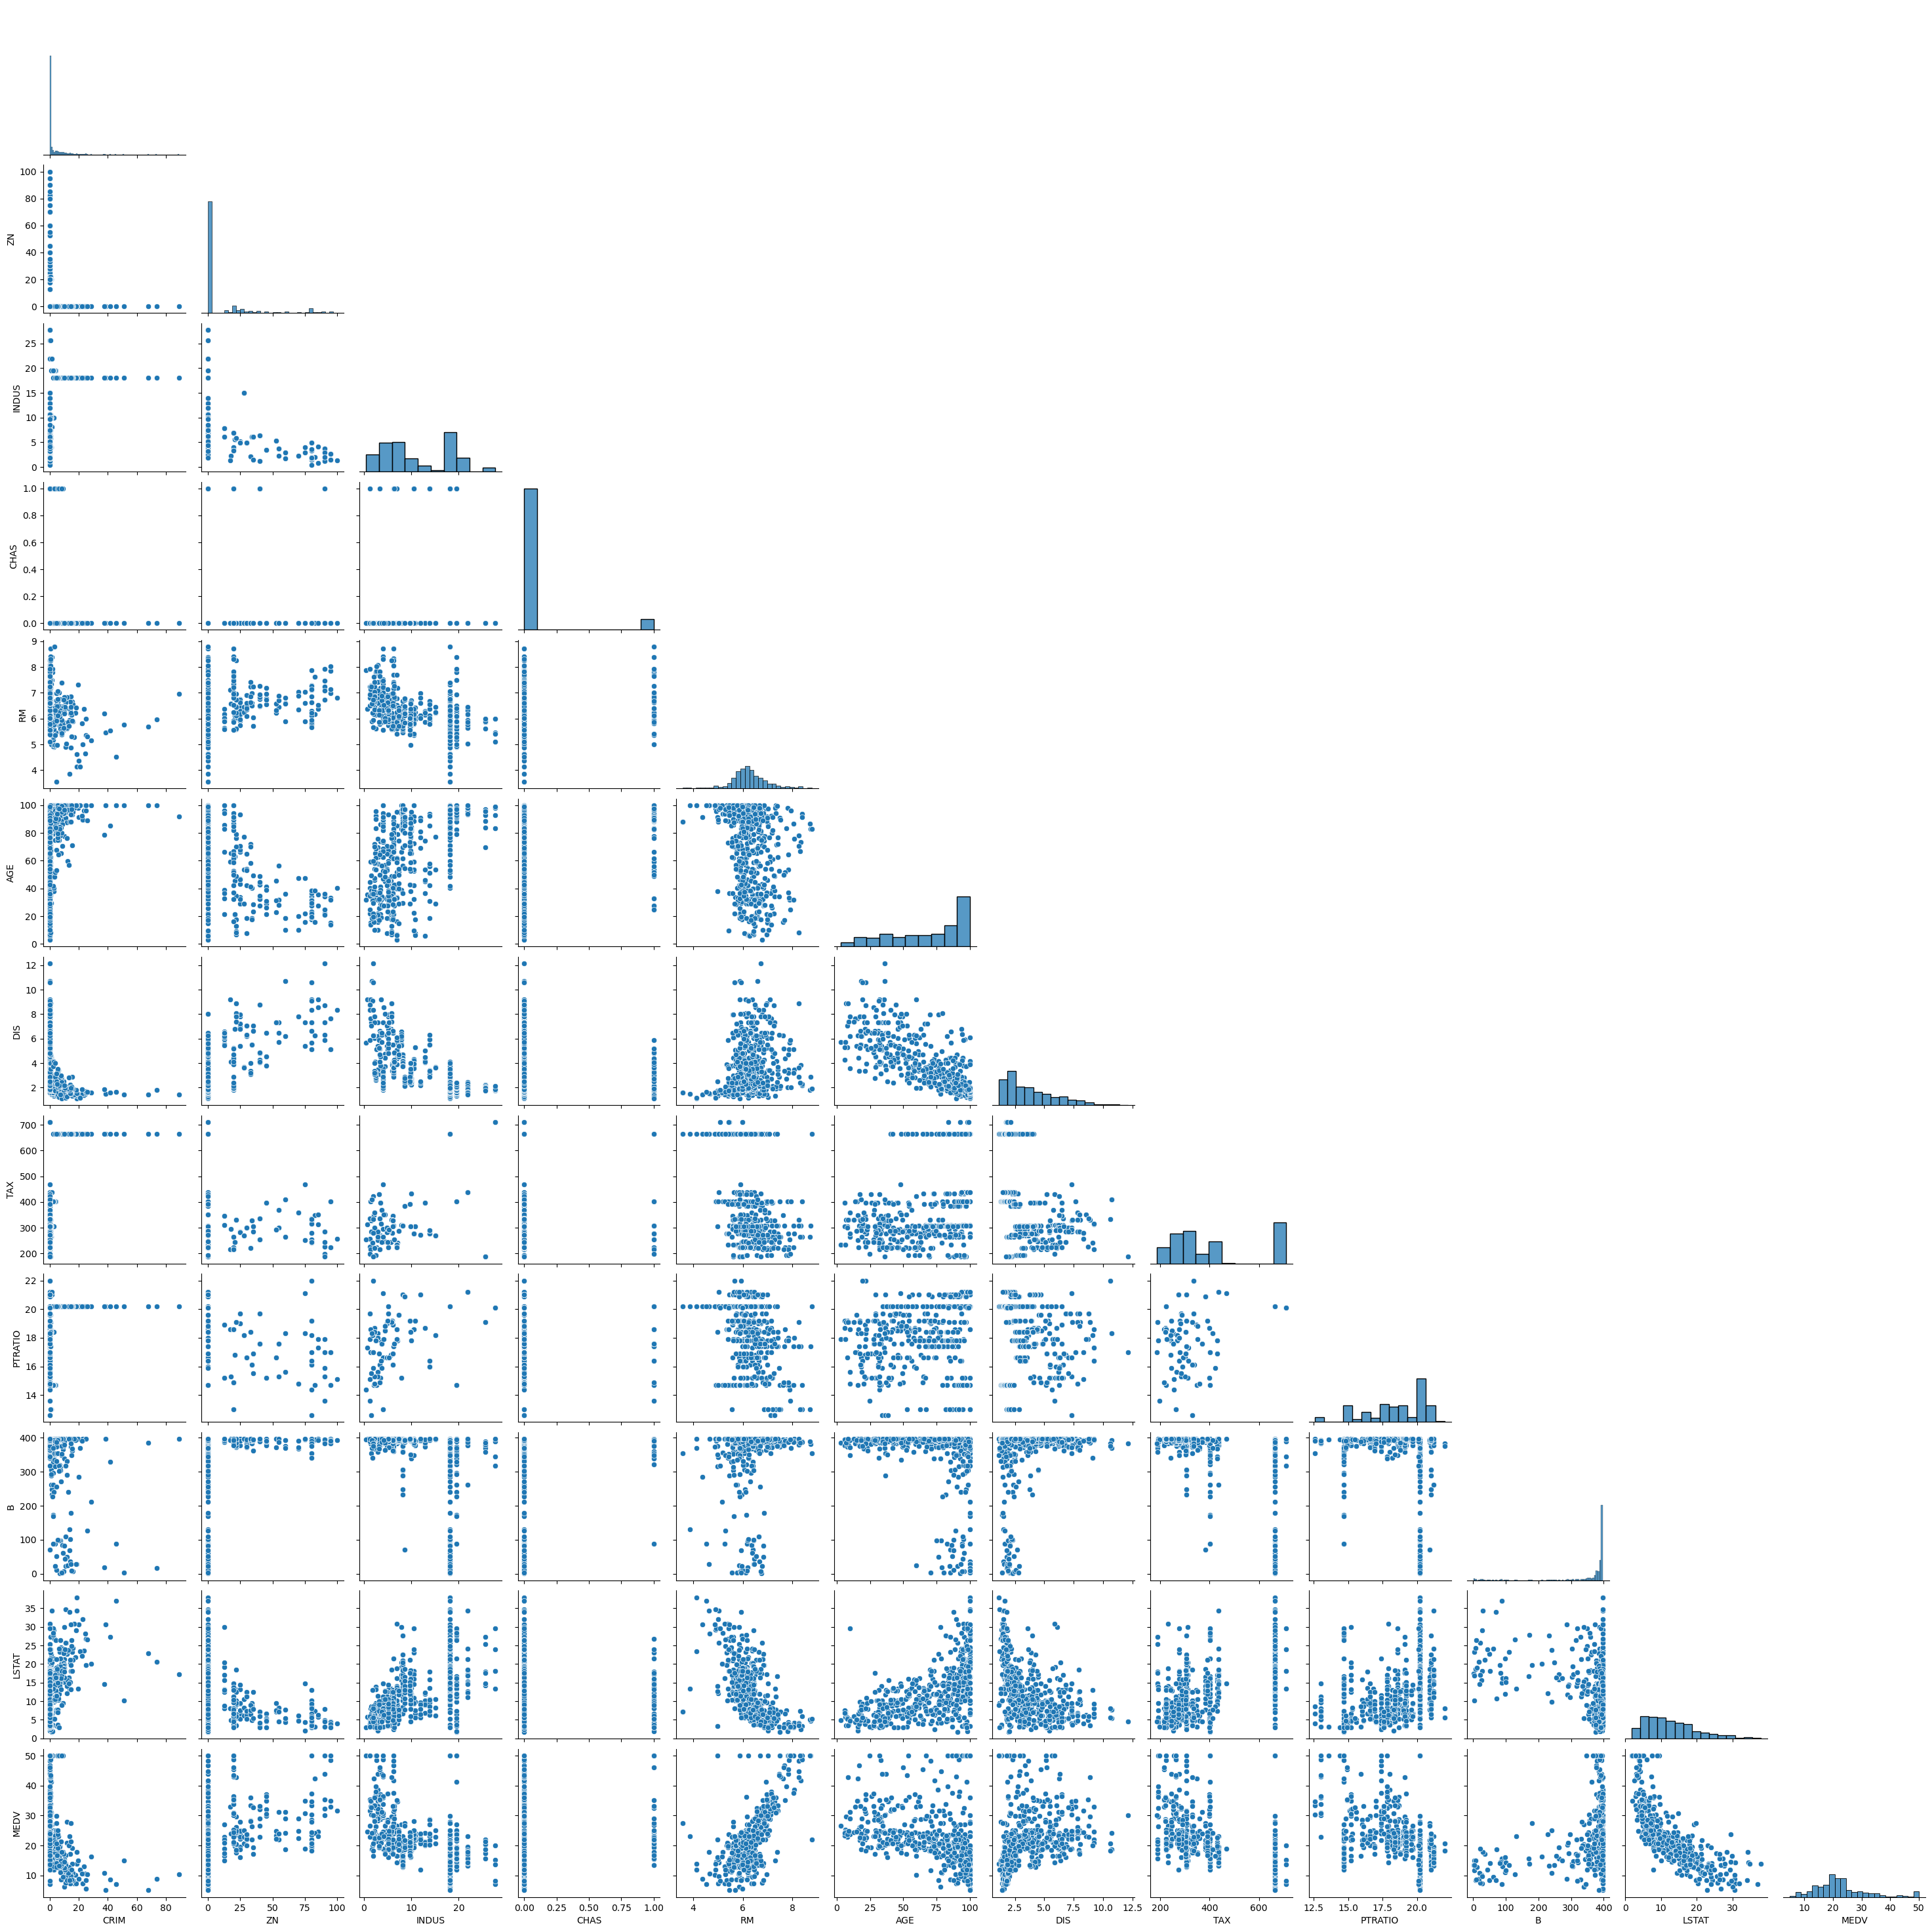

In [23]:
# değişkenler arasındaki scatter plot
sns.pairplot(df2, diag_kind='hist', corner=True)
plt.show()

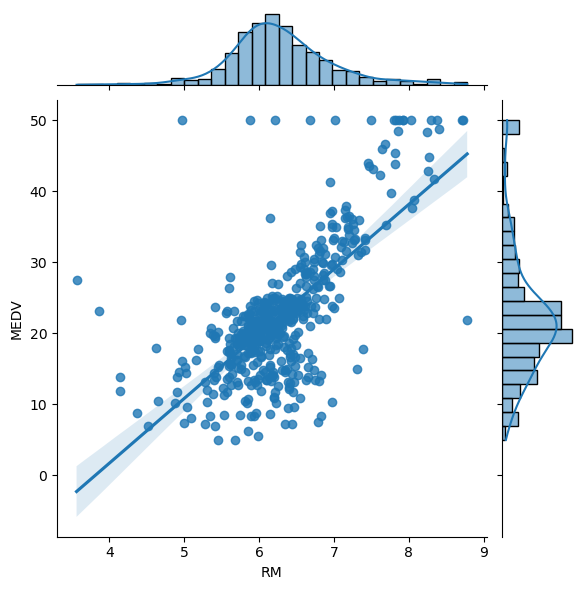

In [24]:
# joint plot
sns.jointplot(x='RM', y='MEDV', data=df2, kind='reg')
plt.show()

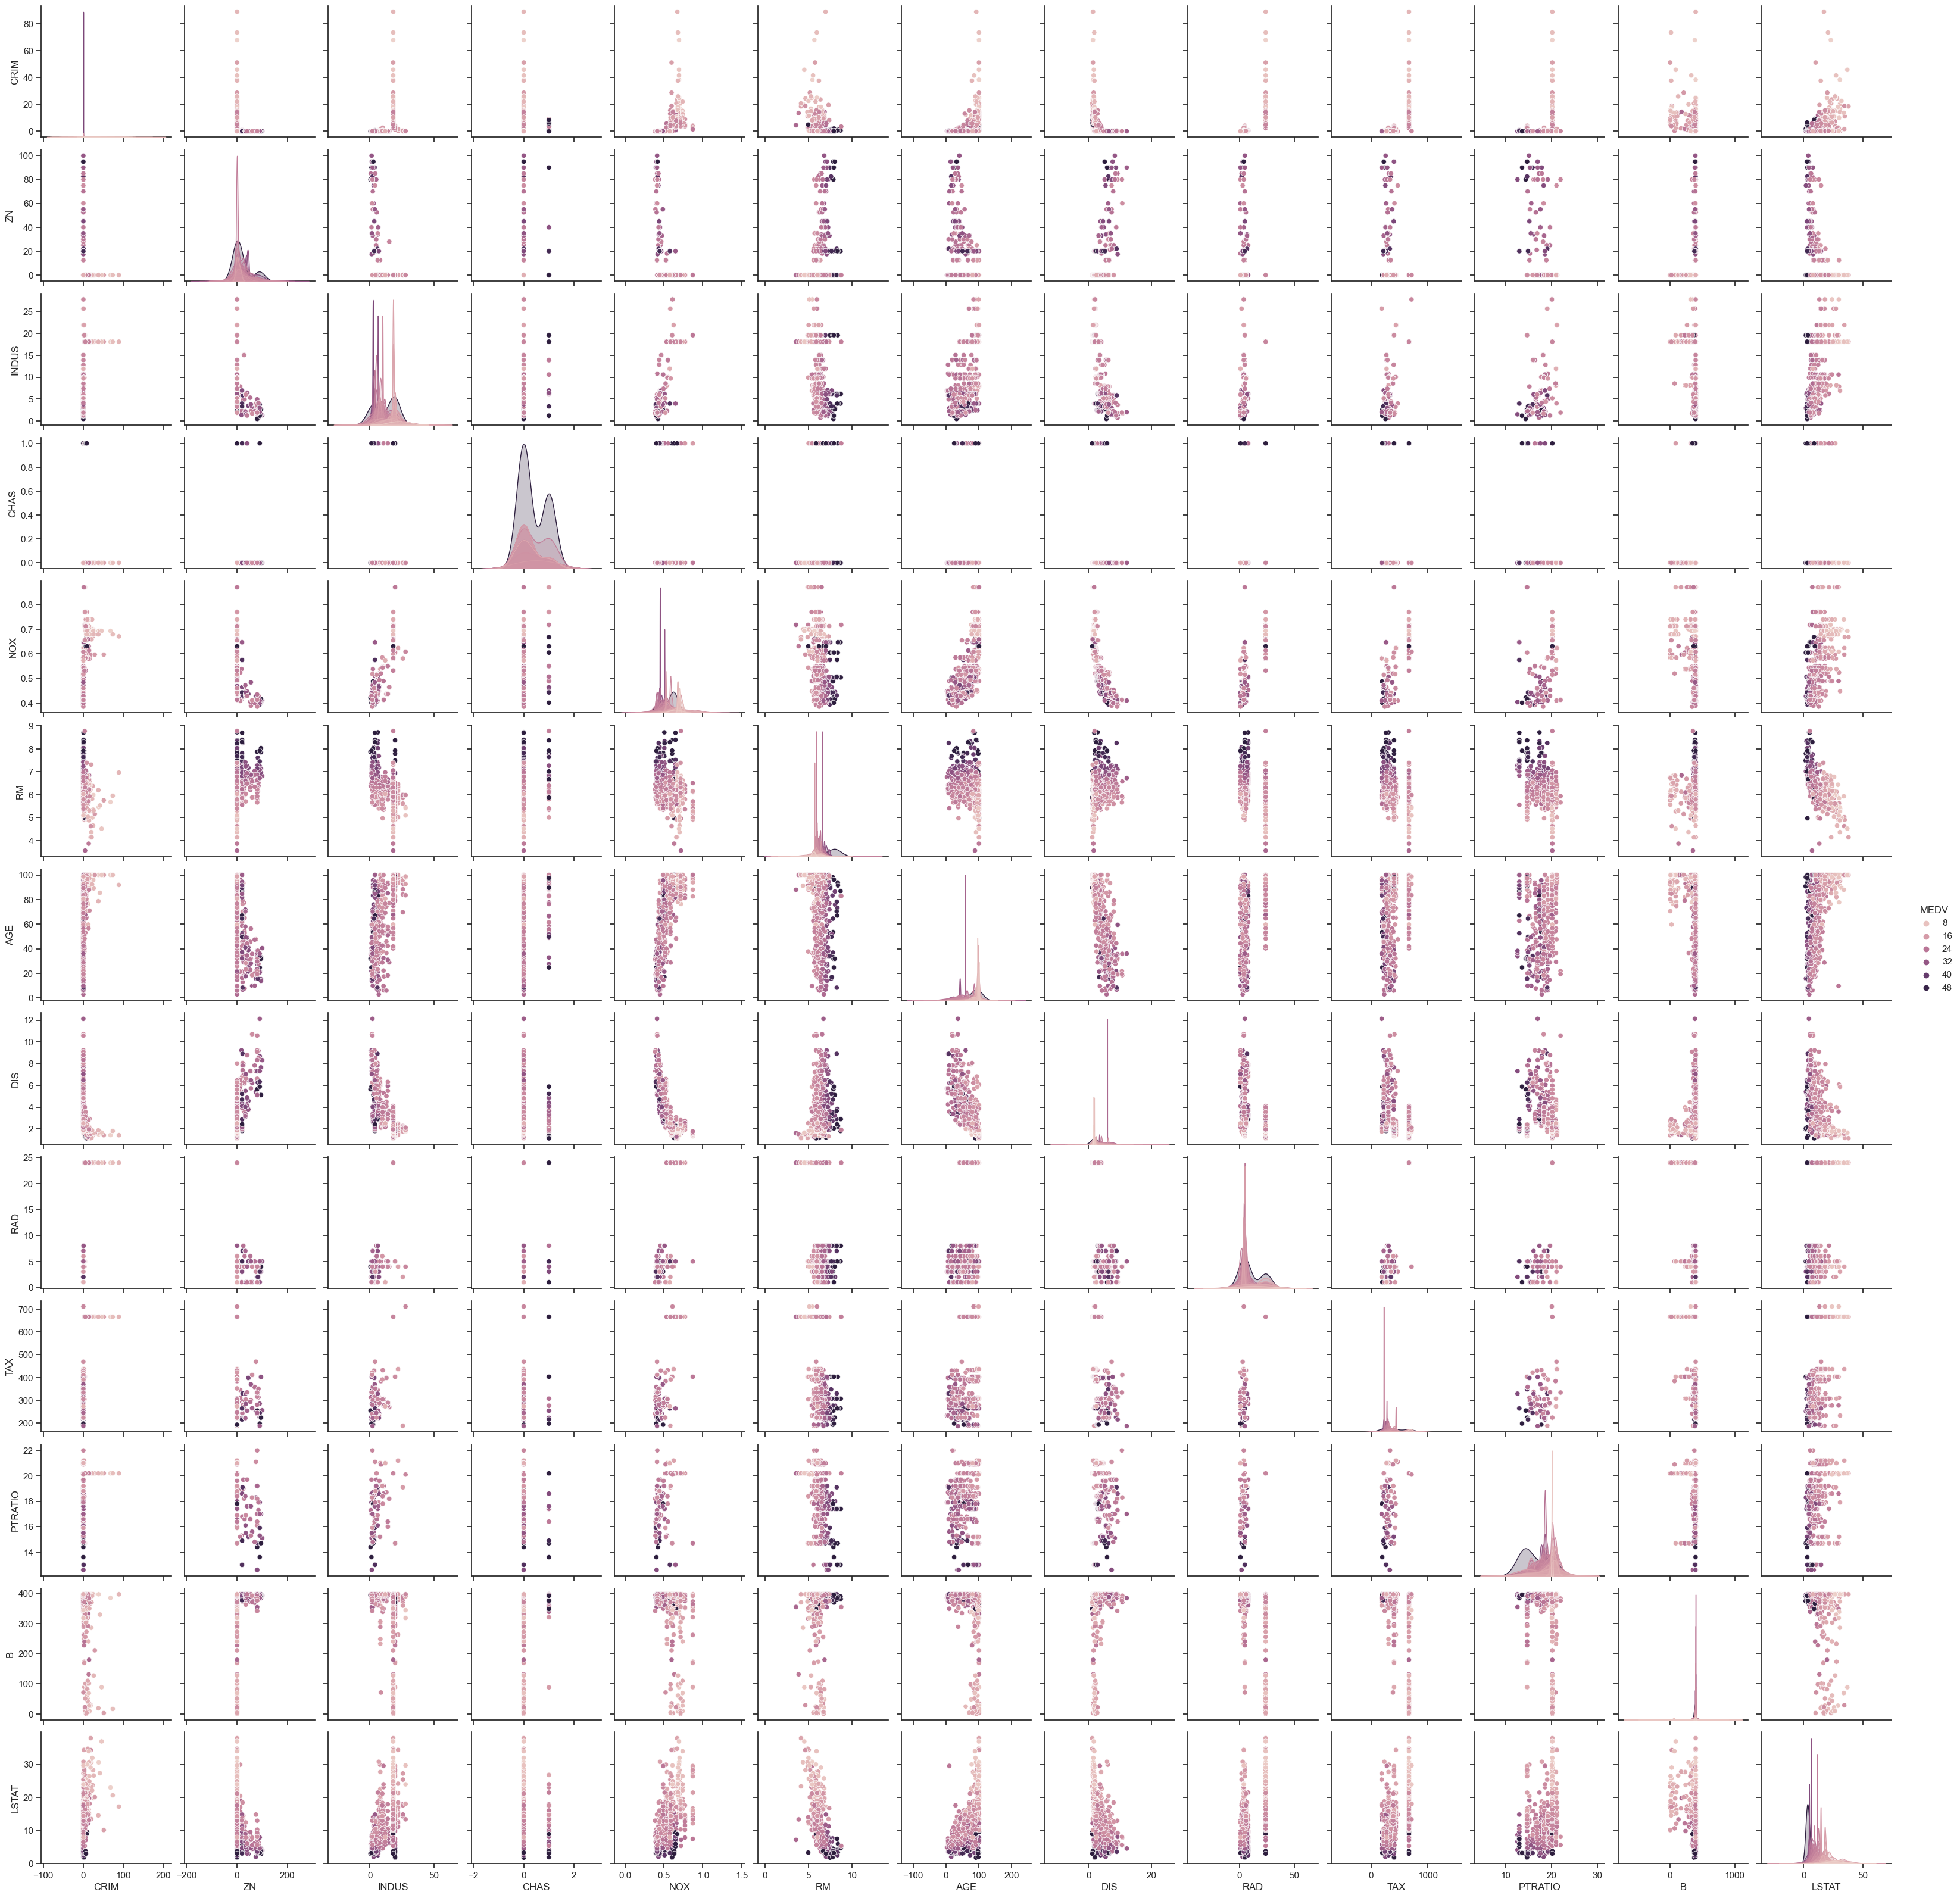

In [25]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, vars=df.columns[:-1], hue="MEDV")
plt.show()

In [27]:
#EKSİK DEĞER VAR MI ?
print(df2.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<AxesSubplot:xlabel='MEDV'>

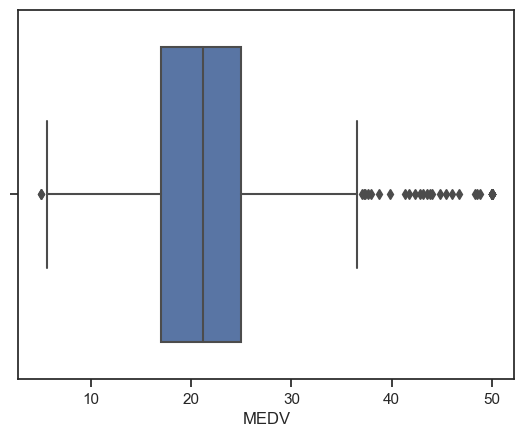

In [28]:
sns.boxplot(x=df2['MEDV'])
#bir çok outlier çıktı

In [29]:
df2.describe().loc[['min', 'max']]
#bütün değişkenlerin min max değerlerine bakmak istiyorum

CRIM     ZN  INDUS  CHAS     RM    AGE      DIS    TAX  PTRATIO  \
min   0.00632    0.0   0.46   0.0  3.561    2.9   1.1296  187.0     12.6   
max  88.97620  100.0  27.74   1.0  8.780  100.0  12.1265  711.0     22.0   

          B  LSTAT  MEDV  
min    0.32   1.73   5.0  
max  396.90  37.97  50.0

In [31]:
import scipy.stats as stats

In [32]:
# Temel istatistiksel özellikler
print(df2.describe())

             CRIM          ZN       INDUS        CHAS          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.253994    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.000000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.000000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.000000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.000000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    1.000000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT        MEDV  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063   22.532806  
std      2.105710  168.537116 

In [33]:
# Çarpıklık ve basıklık değerleri
print("Çarpıklık: ", df2.skew())
print("Basıklık: ", df2.kurtosis())
## çarpıklık ve basıklık değerlerinden veri setimizin normal dağılmadığını görüyoruz

Çarpıklık:  CRIM       5.223149
ZN         2.225666
INDUS      0.295022
CHAS       3.405904
RM         0.403612
AGE       -0.598963
DIS        1.011781
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64
Basıklık:  CRIM       37.130509
ZN          4.031510
INDUS      -1.233540
CHAS        9.638264
RM          1.891500
AGE        -0.967716
DIS         0.487941
TAX        -1.142408
PTRATIO    -0.285091
B           7.226818
LSTAT       0.493240
MEDV        1.495197
dtype: float64


C:\Users\Meric\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


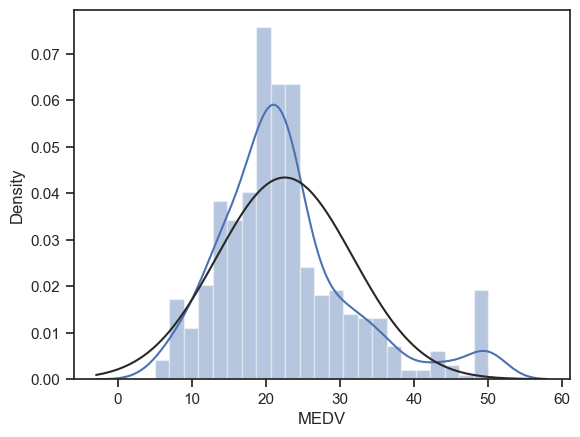

In [34]:
## Çarpıklık ve basıklık kontrolü için histogram çizdir
sns.distplot(df2['MEDV'], fit=stats.norm)
plt.show()
#buradan görebildiğim 50 k değerinde çok fazla uç değer var ve bu modeli normallikten uzaklaştırıyor

In [35]:
## TRAİN TEST AYRIMI
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression

# Bağımsız değişken
X = df2[['RM']]

# Bağımlı değişken
y = df2['MEDV']

# Model nesnesi oluşturma
model = LinearRegression()

# Modeli eğitme
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = model.predict(X_test)

In [38]:
# Performans metriklerini hesapla
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [39]:
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

MSE: 24.291119474973797
MAE: 3.189091965887879
R-squared: 0.6687594935356282
Adjusted R-squared: 0.6198262368988461


In [40]:
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Modelimizi oluşturalım
model = LinearRegression()

# Veri setimizi X ve y değişkenlerine ayıralım
X = df2.drop('MEDV', axis=1)
y = df2['MEDV']

# Cross validation ile model performansını ölçelim
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

# Cross validation sonuçlarını yazdıralım
print('Cross validation R-squared scores: ', scores)
print('Cross validation R-squared mean score: ', scores.mean())

Cross validation R-squared scores:  [0.77501982 0.62424945 0.7594282  0.78766681 0.67581438]
Cross validation R-squared mean score:  0.724435734224026


In [41]:
## çoklu doğrusal regresyon
corr_matrix = df2.corr()

In [42]:
top_corr_features = corr_matrix.index[abs(corr_matrix['MEDV']) > 0.5]

In [43]:
df_top_corr_features = df2[top_corr_features]

In [44]:
X = df_top_corr_features.drop('MEDV', axis=1)
y = df_top_corr_features['MEDV']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [49]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 41.67799012221682
MAE: 4.404434993909257
R-squared: 0.4881642015692508
Adjusted R-squared: 0.47249575876014627


In [51]:
## ridge regresyon
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X = df2.drop('MEDV', axis=1)
y = df2['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 24.341409087916468
MAE: 3.339082531631042
R-squared: 0.6733270990500435
Adjusted R-squared: 0.6476599425468326


In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 27.29091478501662
MAE: 3.798338762475574
R-squared: 0.6337433765564084
Adjusted R-squared: 0.6049660704286977


In [54]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

y_pred = elasticnet.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 27.350149253572727
MAE: 3.7994842280766234
R-squared: 0.6329484227552722
Adjusted R-squared: 0.6041086559717579


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)

X_test_poly = poly_features.fit_transform(X_test)

y_pred = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 42.339891191942286
MAE: 3.777248532521097
R-squared: 0.43177919439169155
Adjusted R-squared: 0.3871332739510387


In [56]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 26.993873884337205
MAE: 3.2355346300676278
R-squared: 0.6377298020084133
Adjusted R-squared: 0.60926571502336


In [57]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 19.10730653954883
MAE: 3.4432455671681637
R-squared: 0.7435711616336518
Adjusted R-squared: 0.7234231814762959


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 10.881456460526316
MAE: 2.158328947368421
R-squared: 0.8539658515379298
Adjusted R-squared: 0.8424917398730529


In [59]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 8.748489384757674
MAE: 2.0889421390629903
R-squared: 0.8825912503287494
Adjusted R-squared: 0.873366277140294


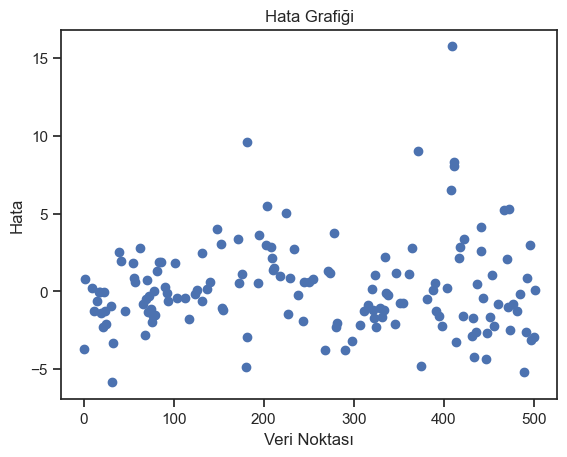

In [60]:
errors = y_test - y_pred
import matplotlib.pyplot as plt
plt.plot(errors, marker='o', linestyle='')
plt.title('Hata Grafiği')
plt.xlabel('Veri Noktası')
plt.ylabel('Hata')
plt.show()

C:\Users\Meric\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


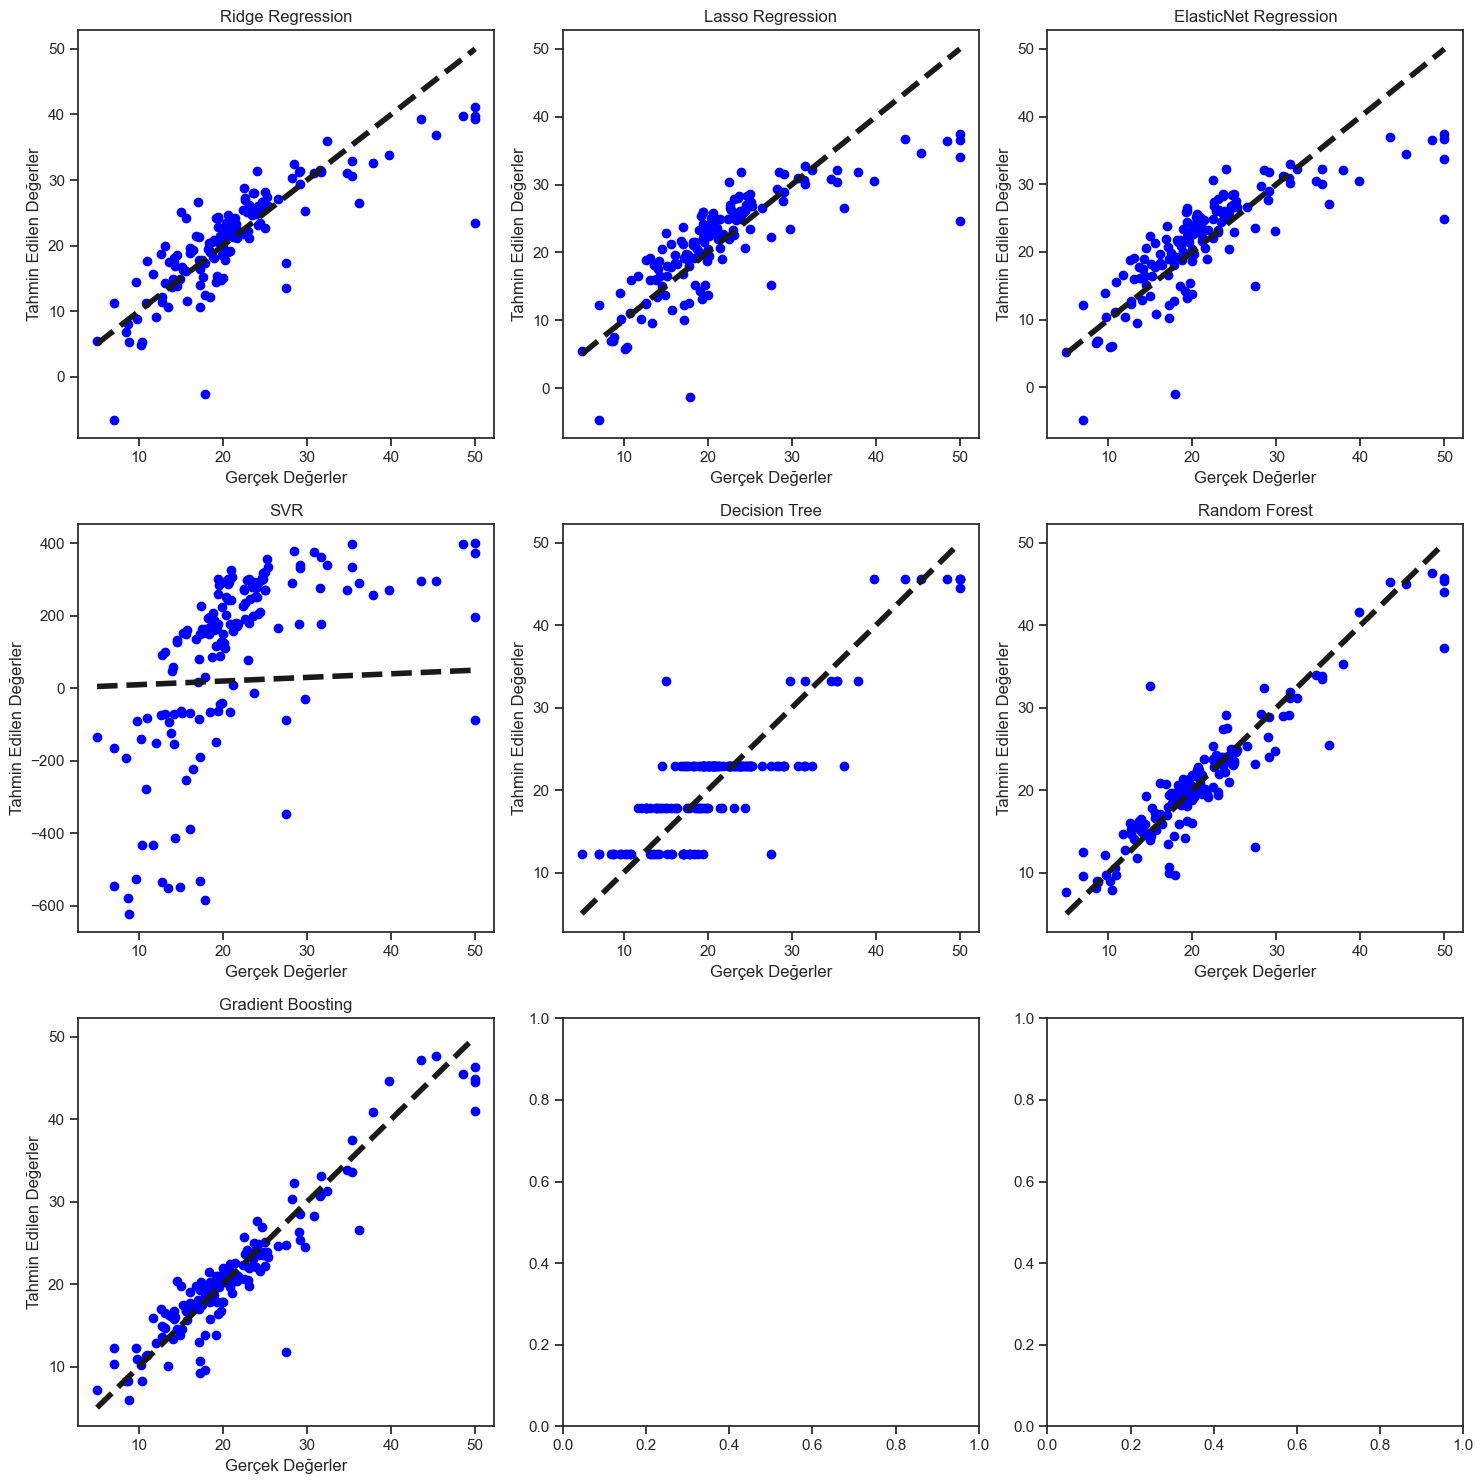

In [61]:
models = [ridge, lasso, elasticnet, svr, dt, rf, gb]
model_names = ['Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

fig, axs = plt.subplots(3, 3, figsize=(15,15))

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    axs[i//3, i%3].scatter(y_test, y_pred, color='blue')
    axs[i//3, i%3].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    axs[i//3, i%3].set_xlabel('Gerçek Değerler')
    axs[i//3, i%3].set_ylabel('Tahmin Edilen Değerler')
    axs[i//3, i%3].set_title(model_names[i])

plt.tight_layout()
plt.show()


In [64]:
# AIC ve BIC hesaplama
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, model.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 351.66991864593274
BIC: 384.9326043752418


In [65]:
# AIC ve BIC hesaplama
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, ridge.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 507.2112046173194
BIC: 540.4738903466284


In [66]:
# AIC ve BIC hesaplama
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, lasso.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 524.596185966964
BIC: 557.858871696273


In [67]:
# AIC ve BIC hesaplama
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, elasticnet.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 524.9257418753624
BIC: 558.1884276046715


In [68]:
# AIC ve BIC hesaplama
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, svr.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 1700.0414359449005
BIC: 1733.3041216742095


C:\Users\Meric\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [69]:
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, dt.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 470.41076209247035
BIC: 503.6734478217794


In [70]:
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, rf.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 384.83313494551555
BIC: 418.0958206748246


In [71]:
n = len(y_test)
k = len(X_test.columns)
RSS = mean_squared_error(y_test, gb.predict(X_test)) * n
AIC = n * np.log(RSS/n) + 2 * k
BIC = n * np.log(RSS/n) + np.log(n) * k

print(f"AIC: {AIC}")
print(f"BIC: {BIC}")

AIC: 351.66991864593274
BIC: 384.9326043752418
